# Predicting Prices of Used Cars on Craigslist

## Utilizing Exploratory Data Analysis to Remove Outliers

We do not want any outliers in our dataset before we make any calculations. However we already eliminated a lot of the outliers due to the common sense cleaning rules (this is particularly true for age, price, and mileage). Further price, and mileage have a non-normal distribution. They both have long tails as values get higher (there are fewer and fewer very expensive vehicles or vehicles with high mileage). They both have a cut at low values as neither mileage nor price is a negative value. Due to all these deletions we have to be conservative in stating a vehicle is an outlier for mileage, price or any variable that was calculated from price or mileage (aka Avg Mileage or MSRP).

Therefore we are conservative in our deletion for these vehicles:
* The 98the percentile and the 99th percentile differ by larger than 1 standard deviation. Then all values greater than the 98th percentile are likely to be outliers.
* Similarly elimiate if 99th percentile and maximum differ by larger than 1 standard deviation. Then all values greater than the 99th percentile are likely to be outliers.

The results of this investigation is that odometer (mileage), average mileage, price, and cylinders needed to be investigated. Below is the new distribution of the vehicles. 
    
We do not investigate lat, long and residuals since later in the modeling process we eliminate these variables due to intercorrelation (see auto_clean_p6).

Loading Data

In [203]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


#Get Path
os.getcwd()
basepath = os.getcwd()
print(basepath)
lis_dir = os.listdir()
print(lis_dir)

# Create the list of file names: filenames
file ='auto_data_merged_cl.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
auto_data= pd.read_csv(file_name_path)


C:\Users\Tiki\Documents\Sprinboard2\Capstone_cars
['.ipynb_checkpoints', '575_1100_compressed_data.csv', '575_1100_compressed_data.csv.zip', '62920_1026452_bundle_archive.zip', 'auto trimmed price.ipynb', 'auto1.ipynb', 'auto1_datawrangling.ipynb', 'auto2.ipynb', 'auto2_Combining Data.ipynb', 'auto3.ipynb', 'autoclean_pr_EDA_long.ipynb', 'autodata3_EDA.ipynb', 'autodata4-imputing Data.ipynb', 'autodata4-PCA.ipynb', 'autodata4.ipynb', 'auto_clean.ipynb', 'auto_clean_copy.ipynb', 'auto_clean_copy2-Copy1.ipynb', 'auto_clean_copy2.ipynb', 'auto_clean_copy2_sqrt.ipynb', 'auto_clean_copy3 State vs Region.ipynb', 'auto_clean_copy3- expand tuning.ipynb', 'auto_clean_copy4.ipynb', 'auto_clean_p1_cleandata.ipynb', 'auto_clean_p2_mergedata.ipynb', 'auto_clean_p3_impute_data.ipynb', 'auto_clean_p4_EDA.ipynb', 'Boxplot.png', 'CapstoneProjectSlides_example.pdf', 'correlation.png', 'correlation2.png', 'correlation_large.png', 'cylinder_drive.png', 'cylinder_drive_mileage_price.png', 'data', 'Error 20

In [48]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135864 entries, 0 to 135863
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       135864 non-null  int64  
 1   region                   135864 non-null  object 
 2   price                    135864 non-null  int64  
 3   year                     135864 non-null  float64
 4   manufacturer             133027 non-null  object 
 5   model                    135864 non-null  object 
 6   condition                135864 non-null  object 
 7   cylinders                122957 non-null  float64
 8   fuel                     135864 non-null  object 
 9   odometer                 135864 non-null  float64
 10  title_status             135858 non-null  object 
 11  transmission             135734 non-null  object 
 12  drive                    132636 non-null  object 
 13  size                     109090 non-null  object 
 14  type

In [49]:
auto_data['resid'] = auto_data['resid'].fillna(0)
auto_data.describe(percentiles= [0.05, .25, .5, .75, 0.95,  0.98, 0.99, 0.999] )
# Rule if the maximum number of the 98the percentile and the 99th percentile differ by larger than 1 std then you elimate those numbers
# Similarly elimiate if 99th percentile and maximum is one standard deviation away elimate to 99th percentile


,id,price,year,cylinders,odometer,lat,long,age,MSRP,Avg_Gas_Price,Median Household Income,Avg_Mileage,resid
count,1.358640e+05,135864.000000,135864.000000,122957.000000,135864.000000,135864.000000,135864.000000,135864.000000,135864.000000,135864.000000,135864.000000,135864.000000,135864.000000
mean,7.087761e+09,16985.193613,2014.185619,5.732671,78798.991675,37.941084,-90.792730,5.814381,3401.706963,2.562033,67037.229546,13844.548073,0.357715
std,5.017708e+06,10949.604972,2.571134,1.578850,50567.452874,5.346003,15.886272,2.571134,10737.804762,0.390233,9945.915390,7710.152579,3.584072
min,7.065765e+09,100.000000,2010.000000,3.000000,0.000000,-51.393200,-166.377000,1.000000,0.000000,2.150000,44092.000000,0.000000,0.000000
5%,7.077191e+09,4900.000000,2010.000000,4.000000,12000.000000,29.579100,-121.430000,2.000000,0.000000,2.160000,53021.000000,3800.295000,0.000000
25%,7.085130e+09,9900.000000,2012.000000,4.000000,37704.000000,33.786500,-96.774100,4.000000,0.000000,2.360000,58150.000000,9036.000000,0.000000
50%,7.088878e+09,15200.000000,2014.000000,6.000000,73298.000000,38.406650,-84.473300,6.000000,0.000000,2.400000,66882.000000,12833.333333,0.000000
75%,7.091976e+09,21900.000000,2016.000000,6.000000,111700.750000,42.065625,-80.240000,8.000000,0.000000,2.680000,73900.000000,17279.025000,0.000000
95%,7.093227e+09,34900.000000,2018.000000,8.000000,166997.750000,45.488100,-72.530000,10.000000,29233.157895,3.490000,86800.000000,26894.500000,2.058923
98%,7.093359e+09,43400.000000,2019.000000,8.000000,193675.940000,47.699774,-71.299426,10.000000,39699.000000,3.490000,87264.000000,33500.000000,2.799825


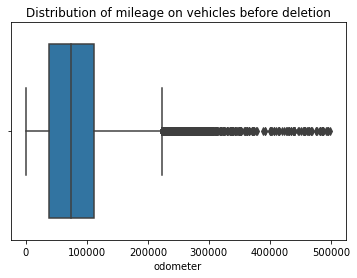

In [204]:
#Investigate Mileage
miles = auto_data.odometer
sns.boxplot(x=miles)
plt.title("Distribution of mileage on vehicles before deletion")
plt.show()
#so many outliers!

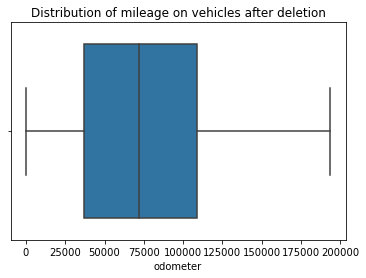

In [205]:
 #We eliminate vehicles with Mileage over the 98th percentile
odometer_p98 = auto_data['odometer'].quantile(.98)

auto_data= auto_data[auto_data.odometer< odometer_p98 ]
miles = auto_data.odometer
sns.boxplot(x=miles)
plt.title("Distribution of mileage on vehicles after deletion")
plt.show()

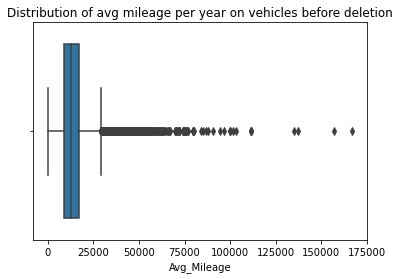

In [206]:
#Investigate Average Mileage using boxplot
avg_miles = auto_data.Avg_Mileage
sns.boxplot(x=avg_miles)
plt.title("Distribution of avg mileage per year on vehicles before deletion")
plt.show()
#so many outliers!

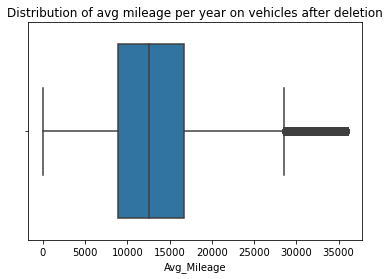

In [207]:
#We eliminate vehicles over the 99th percentile
avm_p99 = auto_data['Avg_Mileage'].quantile(.99)

auto_data= auto_data[auto_data.Avg_Mileage< avm_p99]
avg_miles = auto_data.Avg_Mileage
sns.boxplot(x=avg_miles)
plt.title("Distribution of avg mileage per year on vehicles after deletion")
plt.show()
plt.show()

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


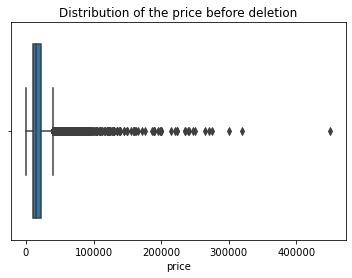

In [208]:
#Investigate price 
price = auto_data.price
sns.boxplot(price)
plt.savefig("Fig1_Price_before_deletion.png")
plt.title("Distribution of the price before deletion")
plt.show()
#so many outliers!

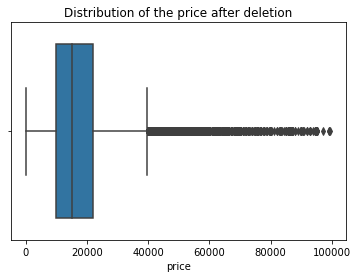

In [209]:
#We do not want to get rid of any vehicles that are in the same price range of the Teslas so we eliminated 
#vehicles under the maximum Tesla price


price_p999 = auto_data['price'].quantile(.999)
auto_data = auto_data[auto_data.price< price_p999]
price = auto_data.price
sns.boxplot(x=price)
plt.title("Distribution of the price after deletion")
plt.savefig("Fig2_Price_after_deletion.png")
plt.show()


C:\Users\Tiki\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


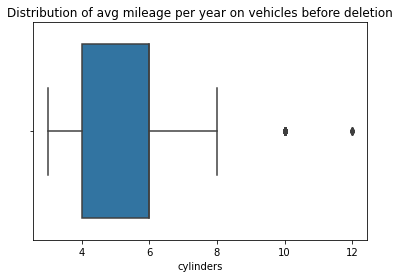

4.0     45675
6.0     43840
8.0     28234
5.0       710
10.0      336
3.0       217
12.0        6
Name: cylinders, dtype: int64


In [210]:
#Check Cylinders
#Investigate cylinders
auto_data['cylinders'] = pd.to_numeric(auto_data['cylinders'])
cylinders = auto_data.cylinders
sns.boxplot(cylinders)
plt.title("Distribution of avg mileage per year on vehicles before deletion")
plt.show()
print(cylinders.value_counts())
#We eliminate 12 as it only has 8 values 
auto_data =  auto_data[auto_data['cylinders']<12]


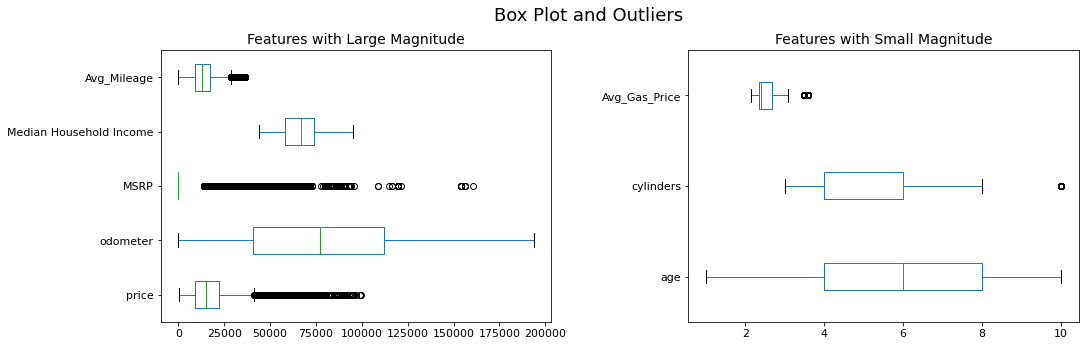

In [212]:
z=auto_data.drop(columns=['id', 'long', 'lat', 'resid', 'year'], axis=1)
zx= z.drop(columns=['age', 'cylinders', 'Avg_Gas_Price'], axis=1)
zy = z[['age', 'cylinders', 'Avg_Gas_Price']]

fig, axs = plt.subplots(1, 2, figsize=(17,5), sharey=True)
fig.suptitle('Box Plot and Outliers', fontsize=18, y=1, x= 0.5)

plt.subplots_adjust(wspace=0.35, left=0.15)
                    
                    
ax = plt.subplot(121)
plt.title("Features with Large Magnitude", fontsize=14)
boxplot = zx.boxplot(grid=False, vert=False,fontsize=11)
plt.subplot(122)
plt.title("Features with Small Magnitude", fontsize=14)
boxplot = zy.boxplot(grid=False, vert=False,fontsize=11)
plt.savefig("figures/Boxplot.png")

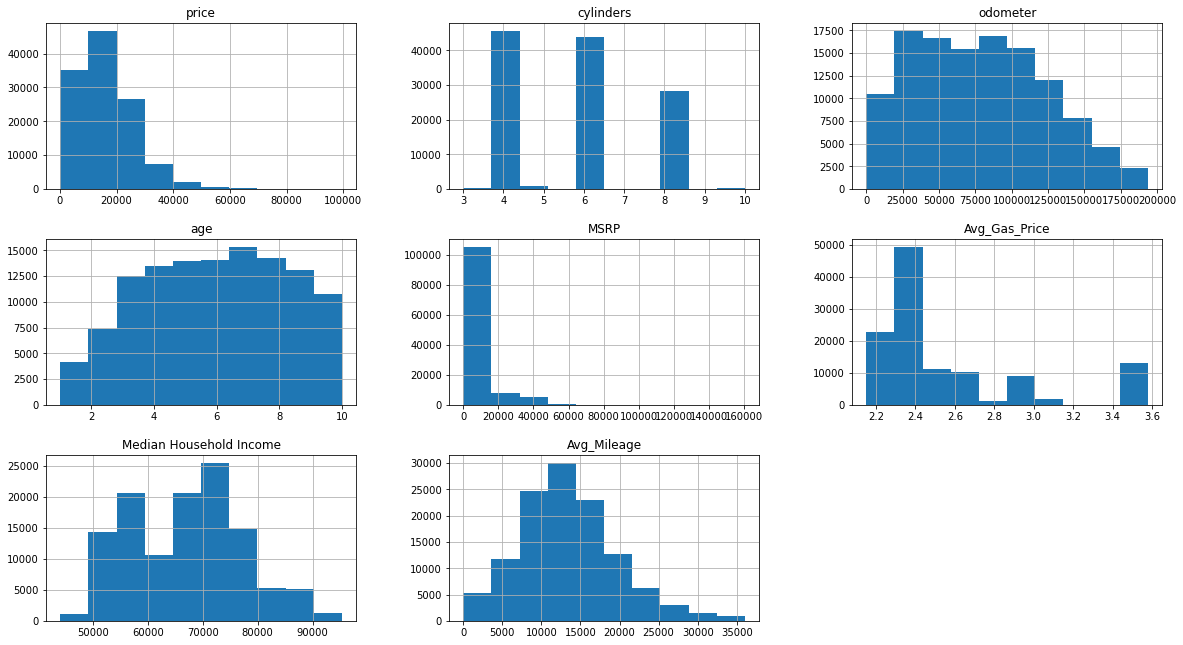

In [213]:
histx = z.hist(figsize=(20,11))

### EDA Explain some of the relationships within the data

KeyboardInterrupt: 

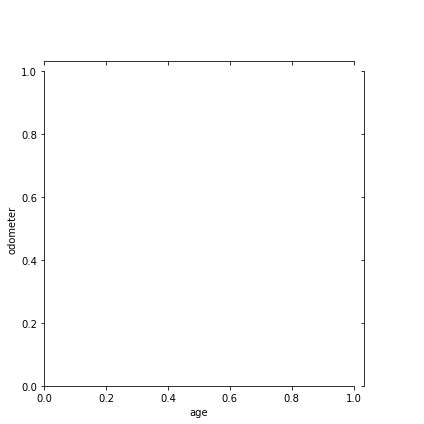

In [143]:
#Investigate Average Mileage
# Average Milage is the mileage divided by the age let's see that relationship 
g = sns.jointplot(x= 'age', y='odometer',data=auto_data, kind='kde')
_ = g.title = 'Age vs Mileage'
#We van see clustered Non Linear replationsip between age and mileage and some pretty clear boundries

## Utilizing Exploratory Data Analysis to View Relationships

Text(0.5, 0.98, 'The decrease in price due to age varies from cylinder type')

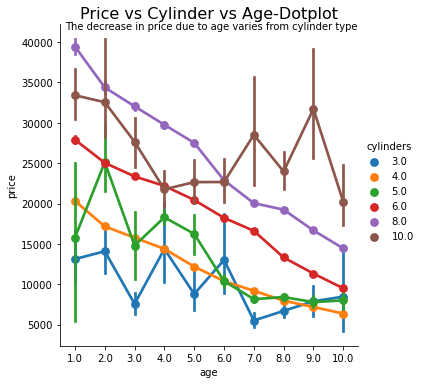

In [146]:
sns.catplot(x="age", y="price", hue="cylinders" , kind='point', data=auto_data)
plt.title('Price vs Cylinder vs Age-Dotplot', fontsize=16)
plt.suptitle('The decrease in price due to age varies from cylinder type', fontsize=10)

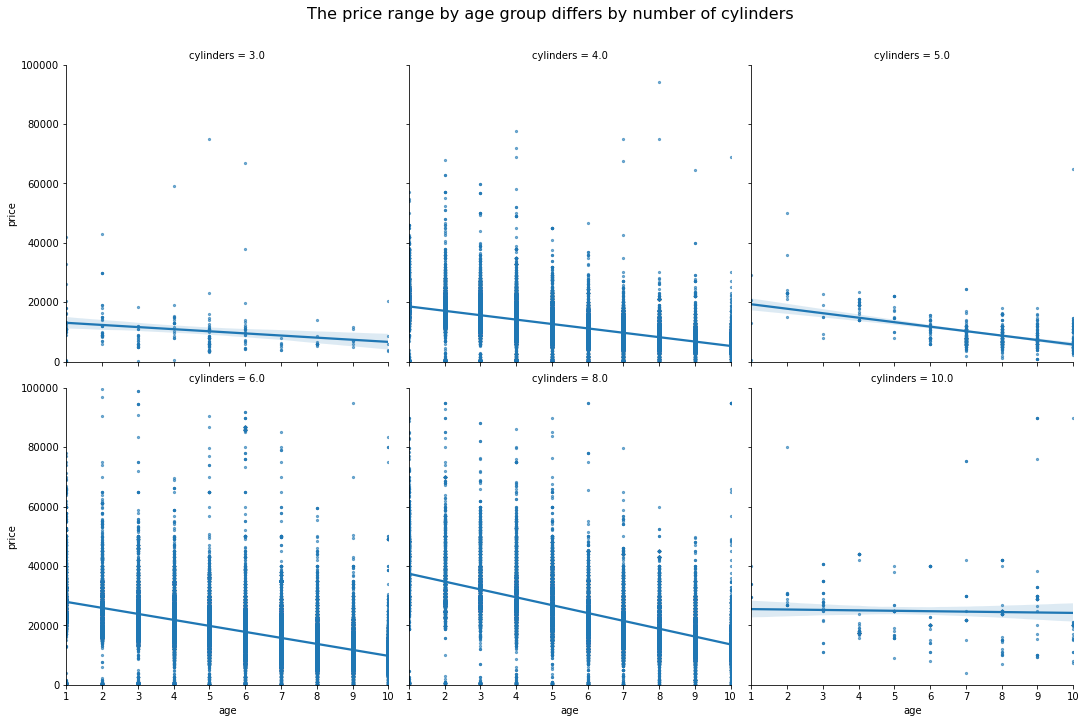

In [214]:
#There is an interesting relationship between cylinders, age and price 
g = sns.lmplot(x= 'age', y='price', data=auto_data,  col="cylinders" , col_wrap=3, scatter_kws={"alpha":.6, "s": 5})
g = (g.set( ylim=(0, 100000)))

g.fig.subplots_adjust(top=0.85) # adjust the Figure in rp
g.fig.suptitle('The price range by age group differs by number of cylinders', fontsize=16)

#Let's create variable showing that young vehicles with 8 vylinders are high value

auto_data['smake_0'] = np.where((auto_data['cylinders'] == 8)  & (auto_data['age'] <= 4.5) , 1, 0)

<Figure size 1008x864 with 0 Axes>

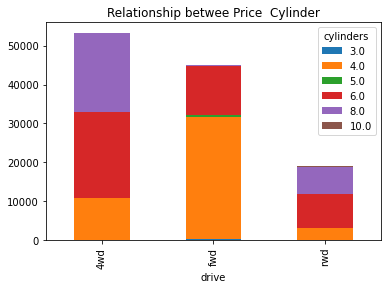

In [184]:
#There is an interesting relationship between cylinders, and drive
size_type_table = pd.crosstab(index=auto_data["drive"], columns=auto_data["cylinders"])
plt.figure(figsize=(14,12))
size_type_table.plot(kind="bar",  stacked=True)
plt.title('Relationship betwee Price  Cylinder')
plt.savefig("cylinder_drive.png")


<Figure size 576x1152 with 0 Axes>

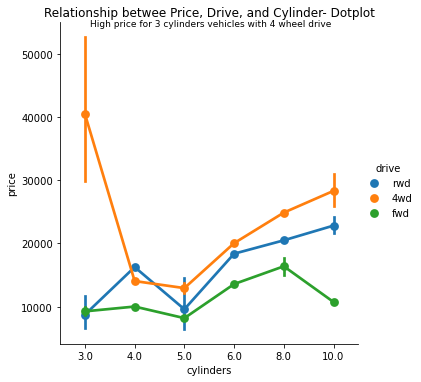

In [215]:
#Which becomes interesting relationship between cylinders, drive and price
plt.figure(figsize=(8,16))
sns.catplot(x="cylinders", y="price", hue='drive', kind='point', data=auto_data)
plt.title('Relationship betwee Price, Drive, and Cylinder- Dotplot')
plt.suptitle('High price for 3 cylinders vehicles with 4 wheel drive', fontsize=9)
plt.savefig("cylinder_drive_mileage_price.png")
#Looking at 4wd we can see that there is high price for cylinders  3 with 4 wheel drie
auto_data['smake_1'] = np.where((auto_data['cylinders'] == 3) & (auto_data['drive'] == '4wd') , 1, 0)


C:\Users\Tiki\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0.5, 0.98, '4WD Vehicles with 6 or 8 cylinders at low mileage have an average price over $20K')

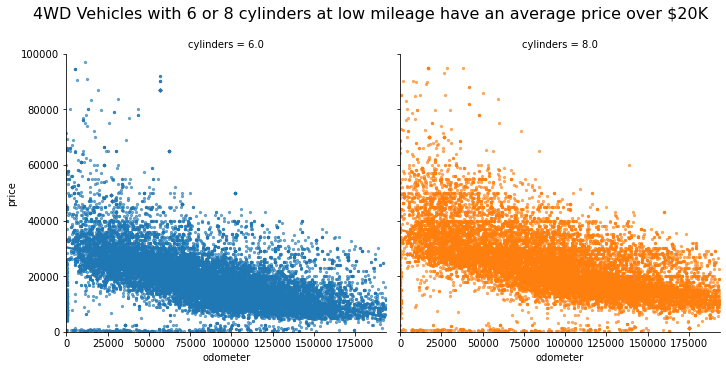

In [223]:
#Still looking at 4 wheel drive we note that cylinders greater than 5 also have a high price

auto_data_4w= auto_data[auto_data['drive'] == '4wd']  
auto_data_4w= auto_data_4w[(auto_data['cylinders']==6) | (auto_data['cylinders']==8)] 
g = sns.lmplot(x= 'odometer', y='price', data=auto_data_4w,  col="cylinders", hue="cylinders", scatter_kws={"alpha":.6, "s": 5})
g = (g.set( ylim=(0, 100000)))
g.fig.subplots_adjust(top=0.85) # adjust the Figure in rp
g.fig.suptitle('4WD Vehicles with 6 or 8 cylinders at low mileage have an average price over $20K', fontsize=16)


C:\Users\Tiki\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Tiki\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0.5, 0.98, '4WD Vehicles with 8 cylinders with less than 50000 miles have an average price over $20K')

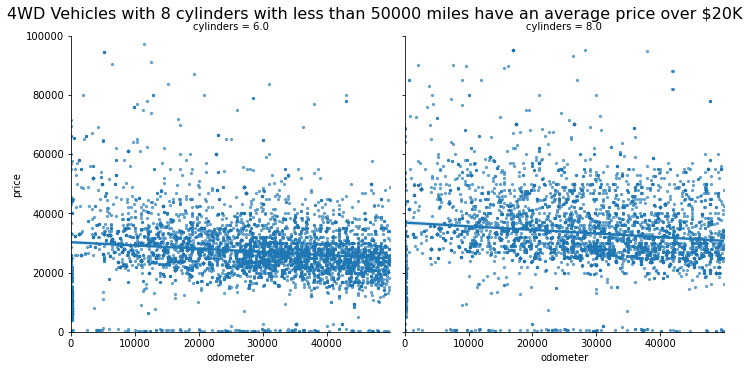

In [216]:
#Taking a closer look at 4 wheel drive we note that cylinders greater than 5 
auto_data_4w= auto_data[auto_data['drive'] == '4wd']  
auto_data_4w= auto_data_4w[(auto_data['cylinders']==6) | (auto_data['cylinders']==8) ] 
auto_data_4w= auto_data_4w[(auto_data['odometer']<50000)] 
g = sns.lmplot(x= 'odometer', y='price',data=auto_data_4w,  col="cylinders", scatter_kws={"alpha":.6, "s": 5})
g = (g.set( ylim=(0, 100000)))
auto_data['smake_2'] = np.where((auto_data['cylinders'] == 6) & (auto_data['drive'] == '4wd')  & (auto_data['odometer'] < 25000), 1 , 0)
auto_data['smake_3'] = np.where((auto_data['cylinders'] == 8) & (auto_data['drive'] == '4wd')  & (auto_data['odometer'] < 50000), 1 , 0)
g.fig.subplots_adjust(top=0.85) # adjust the Figure in rp
g.fig.suptitle('4WD Vehicles with 8 cylinders with less than 50000 miles have an average price over $20K', fontsize=16)


<Figure size 1008x864 with 0 Axes>

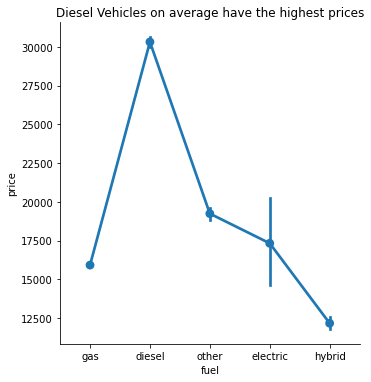

In [198]:
#Diesel has one of the highest price points
plt.figure(figsize=(14,12))
sns.catplot( y="price", x='fuel', kind='point', data=auto_data)
plt.title('Diesel Vehicles on average have the highest prices')
plt.savefig("fuel_drive_price.png")
#Looking at 4wd we can see that there is high price for cylinders  3


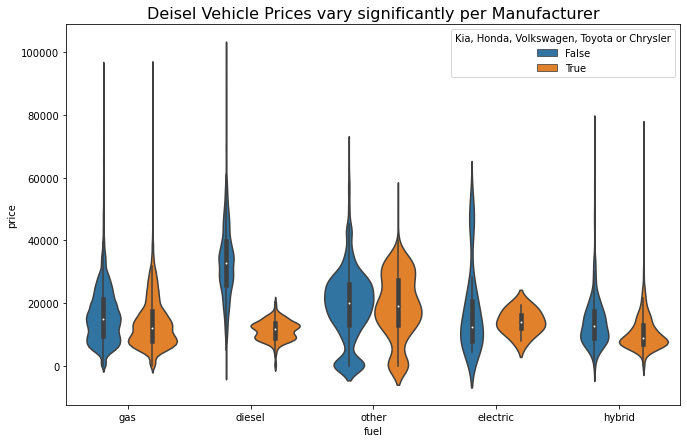

In [228]:
#Looking at Diesel Vehicles we see that some manufacturers do better than others
auto_data_dies= auto_data[auto_data['fuel'] == 'diesel'] 

#picking manufacturer's whose diesel vehicles are not great
lks= ['Kia', 'Honda', 'Volkswagen', 'Toyota', 'Chrysler'] 
pattern = '|'.join(lks)
auto_data['Kia, Honda, Volkswagen, Toyota or Chrysler'] = auto_data['manufacturer'].str.contains(pattern)

fig, violin = plt.subplots(figsize = (11,7))
violin = sns.violinplot(x='fuel', hue='Kia, Honda, Volkswagen, Toyota or Chrysler', y='price', data=auto_data)
plt.title('Deisel Vehicle Prices vary significantly per Manufacturer', fontsize=16)
auto_data['smake_4'] = np.where((auto_data['fuel'] == 'diesel') & (auto_data['Kia, Honda, Volkswagen, Toyota or Chrysler'] == False) , 2 , 0)
auto_data=auto_data.drop(columns=['Kia, Honda, Volkswagen, Toyota or Chrysler'])


In [218]:
auto_data['smake'] = auto_data['smake_1']+ auto_data['smake_0']+ auto_data['smake_2']+ auto_data['smake_3']+ auto_data['smake_4']
auto_data=auto_data.drop(columns=['smake_1', 'smake_0', 'smake_2', 'smake_3', 'smake_4'], axis=1)

C:\Users\Tiki\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Tiki\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Tiki\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

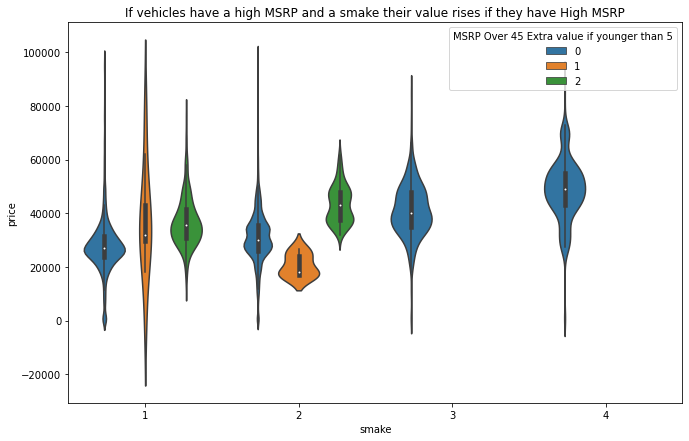

In [219]:
#Looking at smake is there anything else we can do?
auto_data_smake= auto_data[auto_data['smake']>0]

auto_data_smake['High_MSRP_X']= np.where(auto_data_smake['MSRP'] >45000, 1,0)
auto_data_smake['High_MSRP_Y']= np.where((auto_data_smake['MSRP'] >45000) & (auto_data_smake['age'] <5), 1,0)
auto_data_smake['MSRP Over 45 Extra value if younger than 5'] = auto_data_smake['High_MSRP_X']+ auto_data_smake['High_MSRP_Y']

#Graph
fig, violin = plt.subplots(figsize = (11,7))
violin = sns.violinplot(x='smake', y='price', hue= 'MSRP Over 45 Extra value if younger than 5', data=auto_data_smake)
plt.title('If vehicles have a high MSRP and a smake their value rises if they have High MSRP', fontsize=16)

auto_data['smake'] = np.where((auto_data['smake']==1) & (auto_data['MSRP'] >45000), 2 , auto_data['smake'])
auto_data['smake'] = np.where((auto_data['smake'].between(2, 3)) & (auto_data['MSRP'] >45000) & (auto_data['age'] <5) , 4 , auto_data['smake'])


C:\Users\Tiki\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


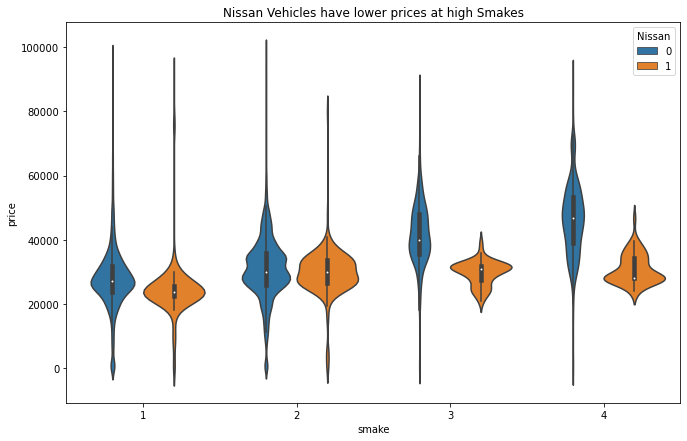

In [220]:
#Nissan Vehicles lower the value of high high end vehicles



auto_data_smake['Nissan']= np.where(auto_data_smake['manufacturer'] == 'Nissan', 1,0)

#Graph
fig, violin = plt.subplots(figsize = (11,7))
violin = sns.violinplot(x='smake', y='price', hue= 'Nissan', data=auto_data)
plt.title('Nissan Vehicles have lower prices at High Smakes', fontsize=15)


auto_data['smake'] = np.where((auto_data['smake'] == 4) & (auto_data['manufacturer'] == 'Nissan'), 2, auto_data['smake'])


In [221]:
auto_data['smake_0'] = np.where((auto_data['cylinders'] == 8)  & (auto_data['age'] <= 4.5) , 1, 0)
auto_data['smake_1'] = np.where((auto_data['cylinders'] == 3) & (auto_data['drive'] == '4wd') , 1, 0)
auto_data['smake_2'] = np.where((auto_data['cylinders'] == 6) & (auto_data['drive'] == '4wd')  & (auto_data['odometer'] < 25000), 1 , 0)
auto_data['smake_3'] = np.where((auto_data['cylinders'] == 8) & (auto_data['drive'] == '4wd')  & (auto_data['odometer'] < 50000), 1 , 0)

lks= ['Kia', 'Honda', 'Volkswagen', 'Toyota', 'Chrysler'] 

pattern = '|'.join(lks)
auto_data['lk'] = auto_data['manufacturer'].str.contains(pattern)
auto_data['smake_4'] = np.where((auto_data['fuel'] == 'diesel') & (auto_data['lk'] == False) , 2 , 0)

auto_data['smake'] = auto_data['smake_1']+ auto_data['smake_0']+ auto_data['smake_2']+ auto_data['smake_3']+ auto_data['smake_4']
auto_data['smake'] = np.where((auto_data['smake']==1) & (auto_data['MSRP'] >45000), 2 , auto_data['smake'])
auto_data['smake'] = np.where((auto_data['smake'].between(2, 3)) & (auto_data['MSRP'] >45000) & (auto_data['age'] <5) , 4 , auto_data['smake'])

auto_data['smake'] = np.where((auto_data['smake'] == 4) & (auto_data['manufacturer'] == 'Nissan'), 2, auto_data['smake'])
auto_data=auto_data.drop(columns=['smake_1', 'smake_0', 'smake_2', 'smake_3', 'smake_4', 'lk'], axis=1)

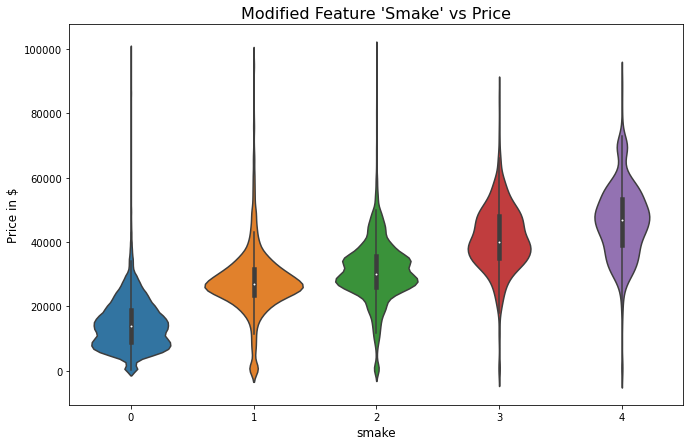

In [229]:

fig, violin = plt.subplots(figsize = (11,7))
violin = sns.violinplot(x='smake', y='price', data=auto_data)
plt.title("Modified Feature 'Smake' vs Price", fontsize=16)
plt.xlabel('smake',fontsize=12)
plt.ylabel('Price in $',fontsize=12)

plt.savefig("figures/Figx_Price_smake.png")


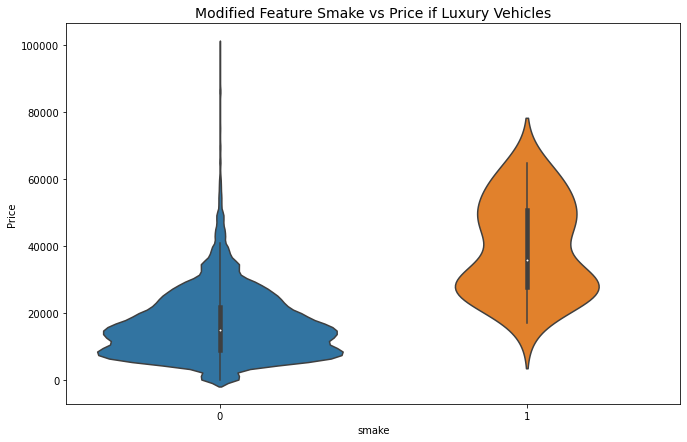

In [230]:
kw= ['Mercedes-Benz', 'Bmw', 'Audi', 'Land-Rover', 'Lexus', 'Acura', 'Jaguar']
qw= ['Alfa-Romeo', 'Tesla', 'Porsche']
auto_data['manufacturerna'] = auto_data['manufacturer'].fillna('unlisted')
auto_data['Lux'] = auto_data['manufacturerna'].apply(lambda x: any([k in x for k in kw])).astype(int)
auto_data['sLux'] = auto_data['manufacturerna'].apply(lambda x: any([q in x for q in qw])).astype(int)
auto_data =auto_data.drop(columns = ['manufacturerna'] )
fig, violin = plt.subplots(figsize = (11,7))
violin = sns.violinplot(x='sLux', y='price', data=auto_data)

plt.title("Modified Feature Smake vs Price if Luxury Vehicles", fontsize=14)
plt.xlabel('smake',fontsize=10)
plt.ylabel('Price',fontsize=10)

plt.savefig("figures/Slux.png")

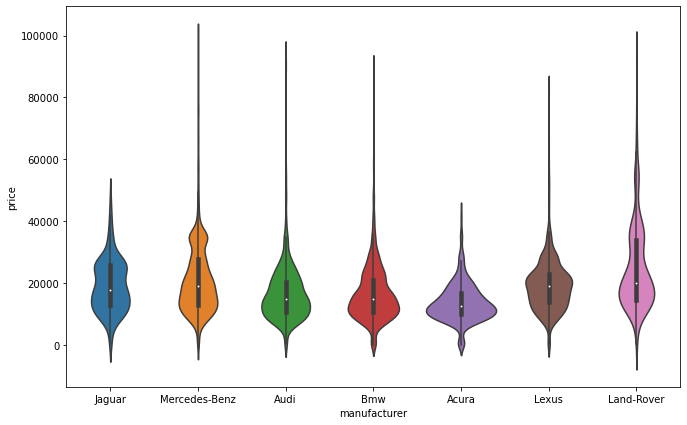

In [86]:
auto_dataL= auto_data[auto_data["Lux"]==1]
fig, violin = plt.subplots(figsize = (11,7))
violin = sns.violinplot(x='manufacturer', y='price',  data=auto_dataL)

## Cleaning Category/ type
* Category refers to the type of design of the vehicle ( examplesedan, hatchback), and it is something people take into consideration while buying a vehicle
* However the naming convention for this is non standard across manufactuers ("pickup" vs "truck" refers to the same type from Ford and GM respectively)
* Considering there are many users on Craigslist even though type is often in the description of a vehicle sold the naming convention would not be consistent from one user description to the next. 
* Since Category type is scraped from the user description means that type is inconsistent across the database

* A Singular third party from an automible expert in this case the USA government will give us a consistent naming convention across all vehicles
* However the goverment gives us a group of possible types a vehicle could be given make model model year

* By combining the user description and the third party categories we get a specific category for each vehicle which has a conistent naming convention across vehicles

* For the merge's we have we are going to check if the category within the description matches what the third party gave


In [76]:
auto_data['type'].value_counts()

Sedan          30830
Suv            27247
Pickup         17458
Truck          13314
Coupe           7176
Other           6353
Hatchback       5119
Van             3913
Wagon           2856
Mini-Van        2416
Convertible     1396
Offroad          189
Bus              128
Name: type, dtype: int64

In [77]:
auto_data['Category'].value_counts()

SUV                                 16307
Sedan                               10912
Sedan, Hatchback                     1568
Sedan, Coupe                         1275
Hatchback                            1238
Wagon                                1231
Van/Minivan                          1143
Pickup                               1026
Coupe, Convertible                    802
Coupe                                 588
Sedan, Wagon                          531
Coupe, Sedan                          321
Hatchback, Sedan                      281
Convertible, Coupe                    242
Sedan, Convertible                    224
Wagon, Sedan                          186
Hatchback, Convertible                157
Sedan, Coupe, Convertible, Wagon      116
Sedan, Coupe, Hatchback               115
Convertible                            92
Sedan, Hatchback, Coupe                64
Sedan, Coupe, Wagon                    50
Sedan, Wagon, Coupe                    45
Coupe, Sedan, Hatchback           

In [78]:
auto_data['Category2']= auto_data['Category'].str.strip().str.split(', ').str[0]
auto_data['Category3']= auto_data['Category'].str.strip().str.split(', ')
auto_data['Category3']= auto_data['Category3'].str.len()
auto_data['type'] = auto_data['type'].replace('Truck', 'Pickup')
auto_data['Category2']= auto_data['Category'].str.strip().str.split(', ').str[0]
auto_data['type2']= auto_data['type'].replace('Offroad', np.nan)
auto_data['type2']= auto_data['type2'].replace('Other', np.nan)
auto_data['type2'] = auto_data['type2'].replace('Mini-Van', 'Van')
auto_data['type2'] = auto_data['type2'].replace('Van', 'Van/Minivan')
auto_data['Categoryf']= auto_data['Category'].fillna('0')
auto_data['typef']= auto_data['type2'].fillna('zzzz')
auto_data['Category_Cleaned1']= np.nan

In [79]:
#If category length = 1 we do not need to look any further
auto_data['Category_Cleaned'] = np.where(auto_data['Category3'] == 1 , auto_data['Category'], np.nan)
print(auto_data['Category_Cleaned'].isnull().sum())

#check if vehicle type listed in description is the sameone that is in the data replace in that case
auto_data['cat_tiki_check0']= auto_data.apply(lambda x: x.typef in x.Categoryf, axis=1)
auto_data.loc[auto_data['cat_tiki_check0'] == True, 'Category_Cleaned1'] = auto_data.type
auto_data['Category_Cleaned'] = auto_data['Category_Cleaned'].fillna(auto_data['Category_Cleaned1'])

#If we can't specify through type and there are only two values listed in Category we pick the first
auto_data['Category_Cleaned'] = auto_data['Category_Cleaned'].fillna(auto_data['Category2'])


#If we can't specify through type and there more than two values listed in Category we use a cleaned version of type
auto_data['type2']= auto_data['type'].replace('Offroad', np.nan)
auto_data['type2']= auto_data['type2'].replace('Other', np.nan)
auto_data['type2'] = auto_data['type2'].replace('Mini-Van', 'Van')
auto_data['type2'] = auto_data['type2'].replace('Van', 'Van/Minivan')

auto_data['Category_Cleaned'] = auto_data['Category_Cleaned'].fillna(auto_data['type2'])
print(auto_data['Category_Cleaned'].isnull().sum())

#If we can't specify through any of the above we call it unlisted
auto_data['Category_Cleaned'] = auto_data['Category_Cleaned'].fillna('Unlisted')

86475
6850


In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(auto_data.corr(),linewidths=.1, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.savefig('figure/correlation2',bbox_inches='tight')

In [80]:
auto_data =auto_data.drop(columns = ['Category2', 'type2', 'Category3', 'Categoryf', 'typef', 'cat_tiki_check0', 'Category_Cleaned1'] )
#save data

new_file = 'data/auto_data_pre_cleaned.csv'
new_file_name_path = os.path.join(basepath, new_file)
auto_data.to_csv(new_file_name_path, index=False)

#### Notes
High corelation linear
* Price , MSRP, 
* Price ,  cylinders
* MSRP , cylinders
* Residual,  cylinders
decent correlation 
* Price odometer
* price age
* age odometer (this does not make sense this should have stronger relationship)

In [81]:
# More visuals regarding the distributions are in eda3